In [2]:
import sys
sys.path.append(r'/home/xian/extra_pkgs/hextof-processor')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpes import fprocessing as fp, visualization as vis
import scipy.io as sio
import animo as a
%matplotlib inline

import mpld3 # interactive plots
mpld3.enable_notebook()
mpld3.disable_notebook()

from importlib import reload
import processor.DldFlashDataframeCreator as DldFlashProcessor
import processor.utils as utils

In [7]:
runs = [22137, 22133, 22135, 22138]
energies = [26.5, 29, 29.5, 31.5]
Tfrom = range(640, 720, 20)
Tto = range(780, 860, 20)
processor = DldFlashProcessor.DldFlashProcessor()
res = []
for ir, run in enumerate(runs):
    processor.runNumber = run

    ToFfrom = 600
    ToFto = 900
    ToFstep = 30*processor.TOF_STEP_TO_NS

    # delay parameters
    delayFrom = -534.6
    delayTo = -509.5
    delayStep = 0.1

    dldFrom = 0
    dldTo = 2800
    dldStep = 35

    try:
        processor.readDataframes()
    except:
        processor.readData()
        processor.storeDataframes()
    # BAM correction
    processor.postProcess()

    processor.resetBins()
    processor.addFilter('microbunchId', lb=100, ub=400)
    pX = processor.addBinning('dldPosX', dldFrom, dldTo, dldStep)
    pY = processor.addBinning('dldPosY', dldFrom, dldTo, dldStep)
    ToF = processor.addBinning('dldTime', ToFfrom, ToFto, ToFstep)
    res.append(processor.computeBinnedData())
res = np.asarray(res)

100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


In [8]:
res.shape

(4, 80, 80, 1458)

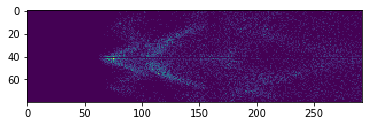

In [7]:
plt.imshow(res[40,:,:])

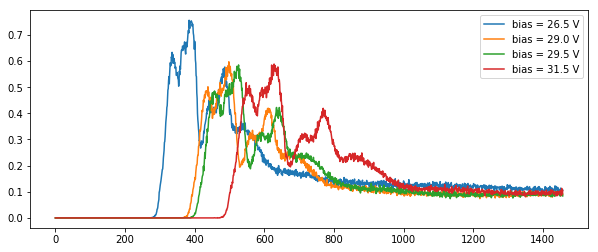

In [19]:
edc265 = res[0,:].mean(axis=(0,1))
edc290 = res[1,:].mean(axis=(0,1))
edc295 = res[2,:].mean(axis=(0,1))
edc315 = res[3,:].mean(axis=(0,1))

plt.figure(figsize=(10,4))
plt.plot(edc265, label='bias = 26.5 V')
plt.plot(edc290, label='bias = 29.0 V')
plt.plot(edc295, label='bias = 29.5 V')
plt.plot(edc315, label='bias = 31.5 V')
plt.legend()

In [13]:
# Find the optimal shift parameter between the energy calibration scans

In [20]:
sio.savemat('calib.mat', {'ToF':ToF, 'pX':pX, 'pY':pY, 'curves':res})